In [5]:
import fispact_dedx
import matplotlib.pyplot as plt

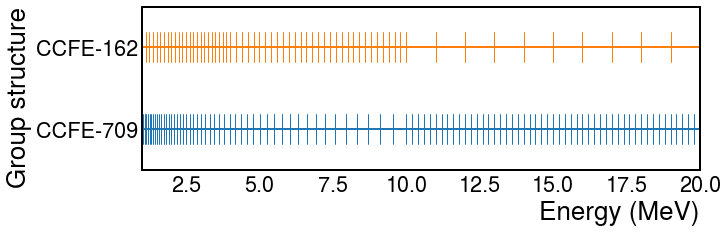

In [2]:
root_dir = "/home/alletro/fispact"
fispact_dedx.plot_group_structure(root_dir)

In [2]:
reaction_dir = "/home/alletro/fispact/mo_a"
fluxes = fispact_dedx.get_flux(reaction_dir)

# =========================================================================================================
root = "/home/alletro/fispact/ru_p"
root = "/home/alletro/fispact/mo_a"
data_type = "Bq" # "ATOMS", "DOSE RATE" or "Bq"
top_energy = 15e6
full_data, time_list = fispact_dedx.extract_data(root, data_type, top_energy)
df3 = fispact_dedx.concat_extracted_data(full_data, time_list, data_type)
df3.to_csv(f"{root}/data_output_{data_type}")

In [13]:
print(list(df3.columns))

['PRODUCT', 'STABILITY', -0.25, -0.22916666666666666, -0.20833333333333334, -0.1875, -0.16666666666666669, -0.14583333333333334, -0.125, -0.10416666666666669, -0.08333333333333334, -0.0625, -0.041666666666666685, -0.020833333333333343, 0.0, 0.041666666666666664, 0.08333333333333333, 0.125, 0.16666666666666666, 0.20833333333333331, 0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 14.0]


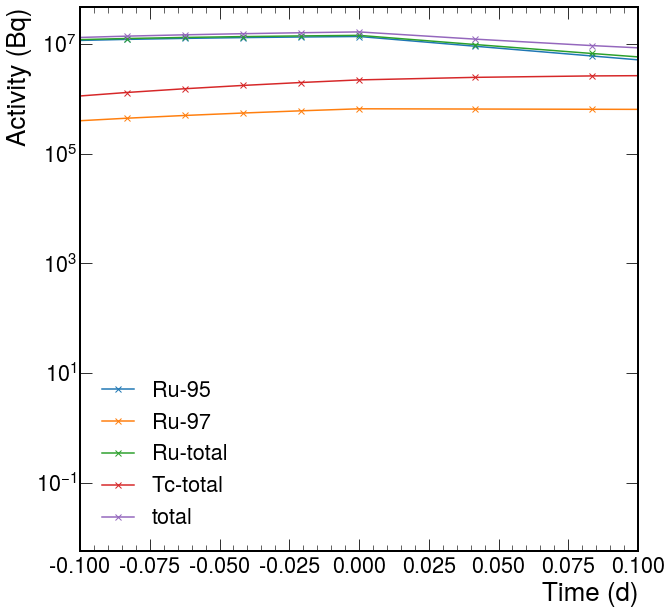

In [8]:
for i, row in df3.iterrows(): 
    if "!" not in row["STABILITY"] and row['PRODUCT'] in ['total', 'Tc-total', 'Ru-total', "Ru-97", "Ru-95", "Ru-94", 'Mo-99']: 
        plt.plot(time_list, row[2:], label = f"{row['PRODUCT']}", marker='x')
#plt.plot([irrad_finish, irrad_finish], [0,1], 'r--')
plt.ylabel("Activity (Bq)")
#plt.ylabel("Atoms (#)")
plt.xlabel("Time (d)")
#plt.xlim(0,0.2)
#plt.ylim(1e10, 1e15)
plt.xlim(-0.1,0.1)
#plt.xscale('log')
plt.yscale('log')
plt.legend()

In [27]:
def print_activities(df, time, isotope = None, unit='Bq'):
    def units(val, unit): 
        if float(val) > 1e9: 
            str_val = f"{round((val / 1e9), 3)} G{unit}"
        elif float(val) > 1e6: 
            str_val = f"{round((val / 1e6), 3)} M{unit}"
        elif float(val) > 1e3: 
            str_val = f"{round((val / 1e3), 3)} k{unit}"
        else:
            str_val = f"{round((val), 3)} {unit}"
        return str_val
    total = units(df3[time][df3['PRODUCT'] == 'total'].values[0], unit)
    print('  ', total)
    if isotope != None:
        isotope = units(df3[time][df3['PRODUCT'] == isotope].values[0], unit)
        print('  ', isotope)
    return
print('Time = 0')
print_activities(df3, 0, 'Ru-97')
print('Time = 1h')
print_activities(df3, 0.041666666666666664, 'Ru-97')
print('Time = 1d')
print_activities(df3, 1, 'Ru-97')
print('Time = 1w')
print_activities(df3, 7, 'Ru-97')

Time = 0
   16.536 MBq
   656.678 kBq
Time = 1h
   12.207 MBq
   650.201 kBq
Time = 1d
   2.017 MBq
   517.083 kBq
Time = 1w
   170.271 kBq
   123.045 kBq


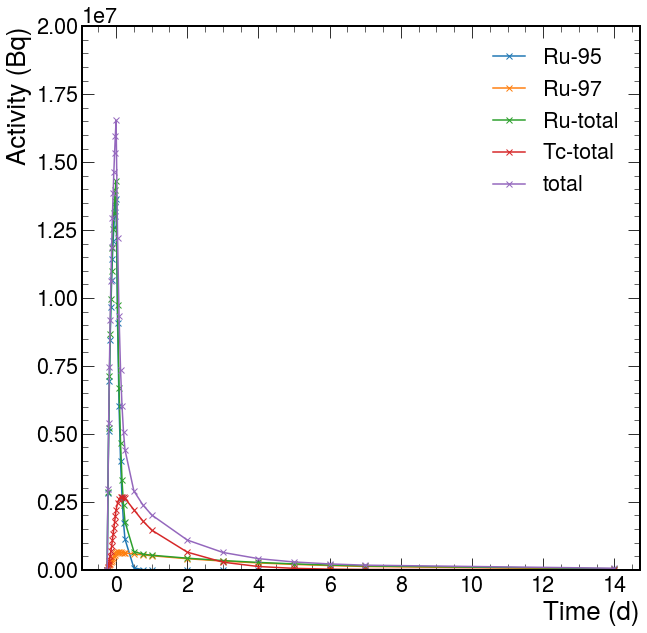

In [11]:
for i, row in df3.iterrows(): 
    if "!" not in row["STABILITY"] and row['PRODUCT'] in ['total', 'Tc-total', 'Ru-total', "Ru-97", "Ru-95", "Ru-94", 'Mo-99']: 
        plt.plot(time_list, row[2:], label = f"{row['PRODUCT']}", marker='x')
#plt.plot([irrad_finish, irrad_finish], [0,1], 'r--')
plt.ylabel("Activity (Bq)")
#plt.ylabel("Atoms (#)")
plt.xlabel("Time (d)")
#plt.xlim(0,0.2)
#plt.ylim(1e10, 1e15)
plt.ylim(-0.1,2e7)
#plt.xscale('log')
#plt.yscale('log')
plt.legend()

In [341]:
np.arange(0,12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])